**Netflix**


Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

Importing the libraries required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
netflix_main = pd.read_csv("netflix.csv")

Checking out the data

In [ ]:
netflix_main.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The data is about the movies and tv shows available on netflix where there is title count of **8807** and each row has **12** different values .We can also see that there some missing bits in between.

In [ ]:
netflix_main.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#  Shape of the data
netflix_main.ndim

2

In [ ]:
netflix_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Separating the nested data

In [ ]:
def seperateandstack(df,name):
  condition = df[name].apply(lambda x: str(x).split(',')).tolist()
  df_new = pd.DataFrame(condition,index=df['title'])
  df_new = df_new.stack()
  df_new = pd.DataFrame(df_new)
  df_new.reset_index(inplace=True)
  df_new = df_new[['title',0]]
  df_new.columns = ['title',name]
  return df_new


In [ ]:
netflix_cast = seperateandstack(netflix_main,'cast')
netflix_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
netflix_director= seperateandstack(netflix_main,'director')

In [ ]:
netflix_country= seperateandstack(netflix_main,'country')

In [ ]:
netflix_listed=seperateandstack(netflix_main,'listed_in')

In [ ]:
temp1 = netflix_cast.merge(netflix_country,how='left',left_on='title',right_on='title')
temp2 = netflix_director.merge(netflix_listed,how='left',left_on='title',right_on='title')
netflix_cleaned = temp1.merge(temp2,how='left',left_on='title',right_on='title')
netflix_cleaned.head()

,title,cast,country,director,listed_in
0,Dick Johnson Is Dead,nan,United States,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,South Africa,nan,International TV Shows
2,Blood & Water,Ama Qamata,South Africa,nan,TV Dramas
3,Blood & Water,Ama Qamata,South Africa,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,South Africa,nan,International TV Shows


In [ ]:
netflix_final = netflix_cleaned.merge(netflix_main[['title','show_id', 'type','date_added','release_year', 'rating', 'duration','description']],how='left',left_on='title',right_on='title')
netflix_final.head()

,title,cast,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,South Africa,nan,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,South Africa,nan,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,South Africa,nan,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,South Africa,nan,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


Since we performed some operations on the data the NaN values were converted to string nans .Hence converting it back to NaN.

In [ ]:
netflix_final = netflix_final.replace('nan', np.nan)

Checking for columns with null values

In [ ]:
netflix_final.isnull().any()

title           False
cast             True
country          True
director         True
listed_in       False
show_id         False
type            False
date_added       True
release_year    False
rating           True
duration         True
description     False
dtype: bool

Imputing the values according to the need

In [ ]:
netflix_final.director.fillna("No Director", inplace=True)
netflix_final.cast.fillna("No Cast", inplace=True)
netflix_final.country.fillna("Country Unavailable", inplace=True)
#duration is present in ration column fix it
netflix_final.dropna(subset=["date_added", "rating","duration"], inplace=True)

In [ ]:
netflix_final.head()

,title,cast,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No Cast,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,South Africa,No Director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,South Africa,No Director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,South Africa,No Director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,South Africa,No Director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
netflix_final.isnull().any()

title           False
cast            False
country         False
director        False
listed_in       False
show_id         False
type            False
date_added      False
release_year    False
rating          False
duration        False
description     False
dtype: bool

In [ ]:
netflix_final['date_added'] = pd.to_datetime(netflix_final['date_added'])

In [ ]:
netflix_final[['duration_value','duration_unit']]=netflix_final['duration'].str.extract('(\d+) (\w+)')
netflix_final['duration_value'] = pd.to_numeric(netflix_final['duration_value'])
netflix_final.head()

,title,cast,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,description,duration_value,duration_unit
0,Dick Johnson Is Dead,No Cast,United States,Kirsten Johnson,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",90,min
1,Blood & Water,Ama Qamata,South Africa,No Director,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,Blood & Water,Ama Qamata,South Africa,No Director,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,Blood & Water,Ama Qamata,South Africa,No Director,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,Blood & Water,Khosi Ngema,South Africa,No Director,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons


Now we ll check out the statistical summary and info of the cleaned data


In [ ]:
netflix_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201837 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           201837 non-null  object        
 1   cast            201837 non-null  object        
 2   country         201837 non-null  object        
 3   director        201837 non-null  object        
 4   listed_in       201837 non-null  object        
 5   show_id         201837 non-null  object        
 6   type            201837 non-null  object        
 7   date_added      201837 non-null  datetime64[ns]
 8   release_year    201837 non-null  int64         
 9   rating          201837 non-null  object        
 10  duration        201837 non-null  object        
 11  description     201837 non-null  object        
 12  duration_value  201837 non-null  int64         
 13  duration_unit   201837 non-null  object        
dtypes: datetime64[ns](1), int64(2), obje

In [ ]:
netflix_final.describe()

,release_year,duration_value
count,201837.000000,201837.000000
mean,2013.450913,77.765439
std,9.017601,51.454029
min,1925.000000,1.000000
25%,2012.000000,4.000000
50%,2016.000000,95.000000
75%,2019.000000,112.000000
max,2021.000000,312.000000


In [ ]:
netflix_final.T.apply(lambda x: x.isnull().sum(), axis = 1)
#We don't have any null values left in the columns

title             0
cast              0
country           0
director          0
listed_in         0
show_id           0
type              0
date_added        0
release_year      0
rating            0
duration          0
description       0
duration_value    0
duration_unit     0
dtype: int64

No of titles added each year  

In [ ]:
netflix_final["year_added"] = netflix_final.date_added.dt.year
netflix_movies = netflix_final.loc[netflix_final['type'] == 'Movie']
netflix_tvshows = netflix_final.loc[netflix_final['type'] == 'TV Show']

In [ ]:
netflix_yearwise=netflix_final.groupby(['year_added'])['title'].nunique().to_frame().reset_index().rename(columns={"index":"year_added","title":"count"})
netflix_yearwise.head()

,year_added,count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3


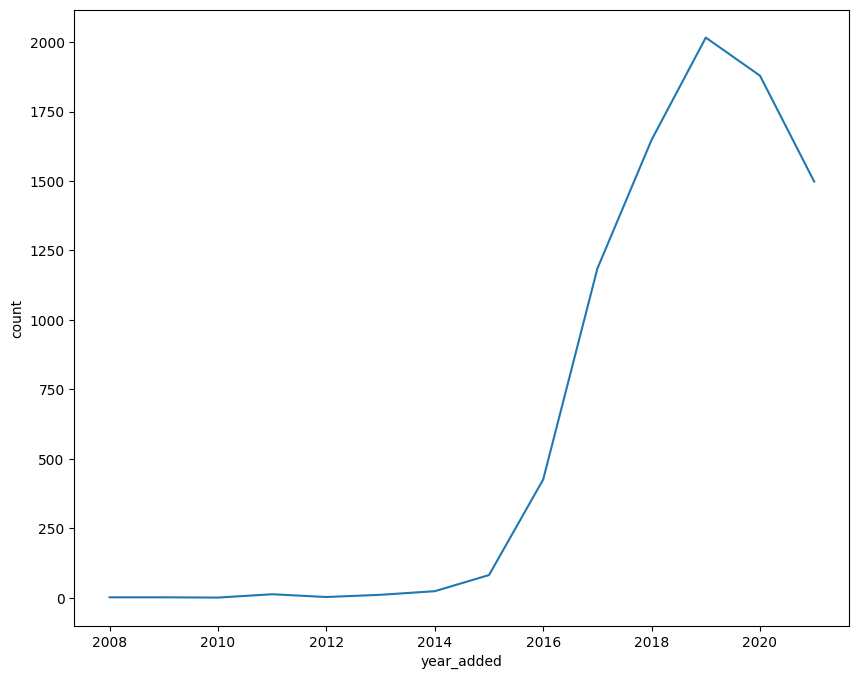

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data = netflix_yearwise,x='year_added',y='count')
plt.show()

From the above bar plot we can see that the streaming app started adding more content post 2013 and this saw a peak at around 2000 titles in the year 2019

Lets check the no of movies and tv shows added yearwise

In [ ]:
netflix_movies_year= netflix_movies.groupby(['year_added'])['title'].nunique().to_frame().reset_index().rename(columns={"index":"year_added","title":"count"})
netflix_tvshows_year = netflix_tvshows.groupby(['year_added'])['title'].nunique().to_frame().reset_index().rename(columns={"index":"year_added","title":"count"})


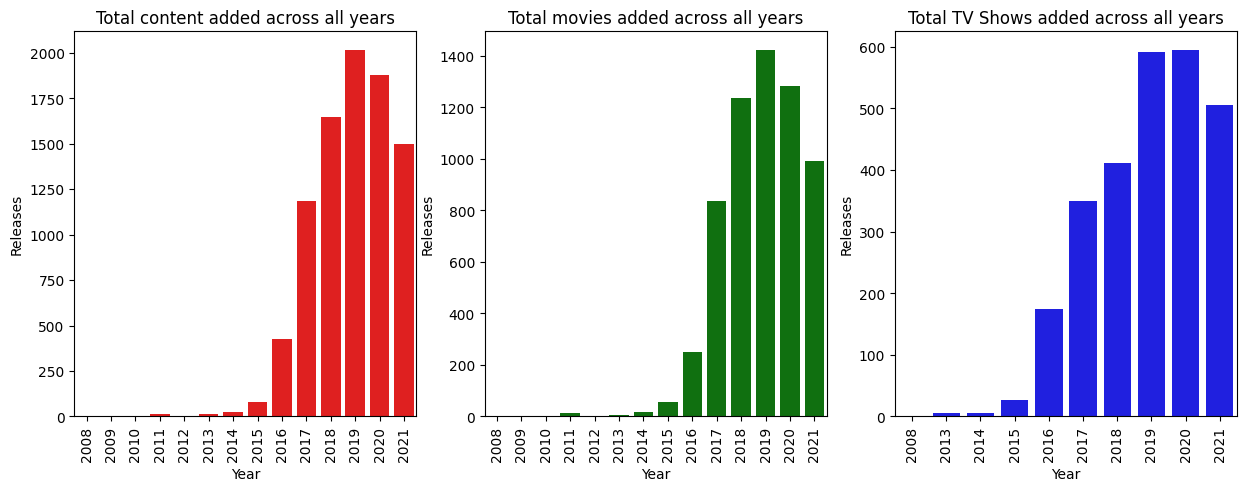

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(data=netflix_yearwise, x='year_added', y='count',color='r')
plt.title("Total content added across all years")
plt.xticks(rotation=90)
plt.ylabel("Releases")
plt.xlabel("Year")

plt.subplot(1,3,2)
sns.barplot(data=netflix_movies_year, x='year_added', y='count',color='g')
plt.title("Total movies added across all years")
plt.xticks(rotation=90)
plt.ylabel("Releases")
plt.xlabel("Year")

plt.subplot(1,3,3)
sns.barplot(data=netflix_tvshows_year, x='year_added', y='count',color='b')
plt.title("Total TV Shows added across all years")
plt.xticks(rotation=90)
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

The growth in the number of movies on Netflix is much higher
than that on TV shows. More than 1,300 new movies were added in both 2018 and 2019. Besides, we can say that Netflix has increasingly focused on movies rather than TV shows in recent past years.

Distribution of content by type on Netflix

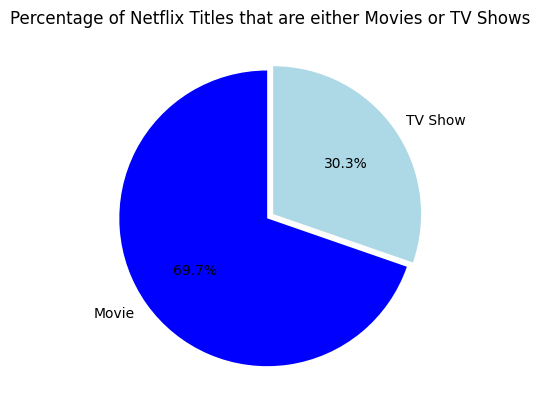

In [ ]:
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g=plt.pie(netflix_final.groupby(['type'])['title'].nunique(),explode=(0.025,0.025),
          labels=netflix_final.groupby(['type'])['title'].nunique().to_frame().index,
          colors=['blue','lightblue'],autopct='%0.1f%%', startangle=90)
plt.show()

The content for movies is larger than that for TV shows.

Lets try and best actor-director pair

In [ ]:
netflix_final_filtered = netflix_final.loc[(netflix_final['director'] != 'No Director') & (netflix_final['cast'] != 'No Cast')]
netflix_final_filtered.groupby(['cast','director'])['title'].nunique().sort_values(ascending=False)

cast             director       
 Julie Tejwani   Rajiv Chilaka      19
 Rajesh Kava     Rajiv Chilaka      19
 Rupa Bhimani    Rajiv Chilaka      18
 Jigna Bhardwaj  Rajiv Chilaka      18
Vatsal Dubey     Rajiv Chilaka      16
                                    ..
 James Eckhouse  Rob LaDuca          1
 James Eliya     Musthafa            1
 James Faulkner   Daisuke Nishio     1
                  Frank O'Connor     1
Ṣọpẹ́ Dìrísù     Remi Weekes         1
Name: title, Length: 48651, dtype: int64

The Best Actor Director pair in terms of the number of titles done together is **Julie Tejwani** and **Rajiv Chilaka**

Countrywise contribution to the content on Netflix

In [ ]:
import plotly.graph_objects as go

filtered_countries = netflix_main.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
fig = go.Figure(go.Choropleth(
    locationmode='country names',
    locations=filtered_countries,
    z=filtered_countries.value_counts(),
    colorscale='YlGnBu',
))

fig.update_layout(title=None,geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),)

fig.show()

As we can observe US is the Most Popular Content Producer followed bu South Africa and India.

Top 10 Genres on Netflix

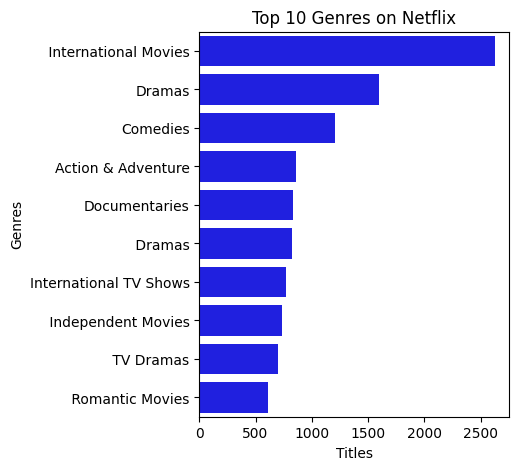

In [ ]:
#netflix_listed.head()
plt.figure(figsize=(4,5))
g = sns.countplot(y = netflix_listed.listed_in, order=netflix_listed.listed_in.value_counts().index[:10],color='blue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


From the graph, we see that International Movies take the first place, followed by dramas and comedies.

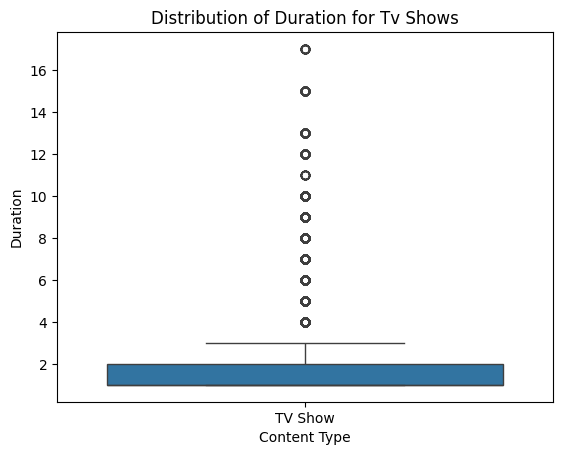

In [ ]:
sns.boxplot(data=netflix_tvshows, x='type', y='duration_value')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Tv Shows')
plt.show()

For TV shows, the box plot reveals that most shows have two to four seasons, with very few outliers having longer durations.

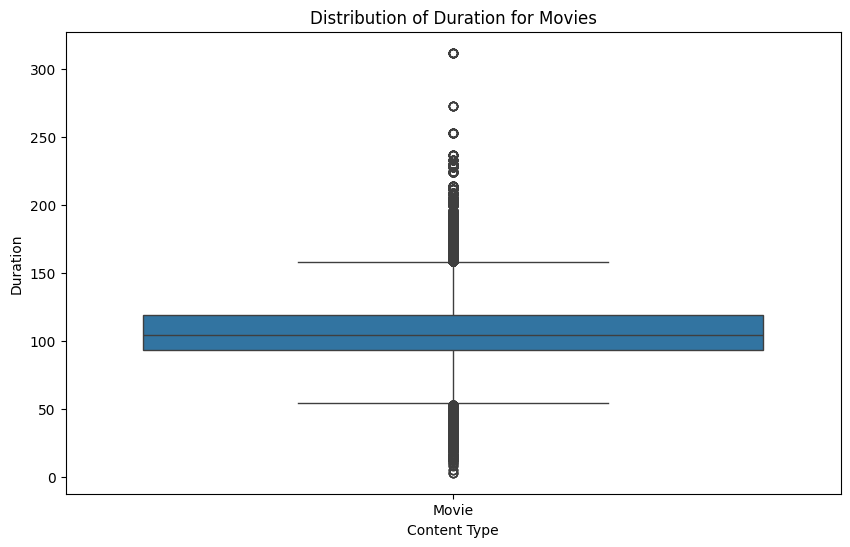

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=netflix_movies, x='type', y='duration_value')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

We can see that most movies fall within a standard duration
range, with few outliers exceedingly approximately 2.5 hours. This suggests that most movies on Netflix are designed to fit within a standard viewing time.

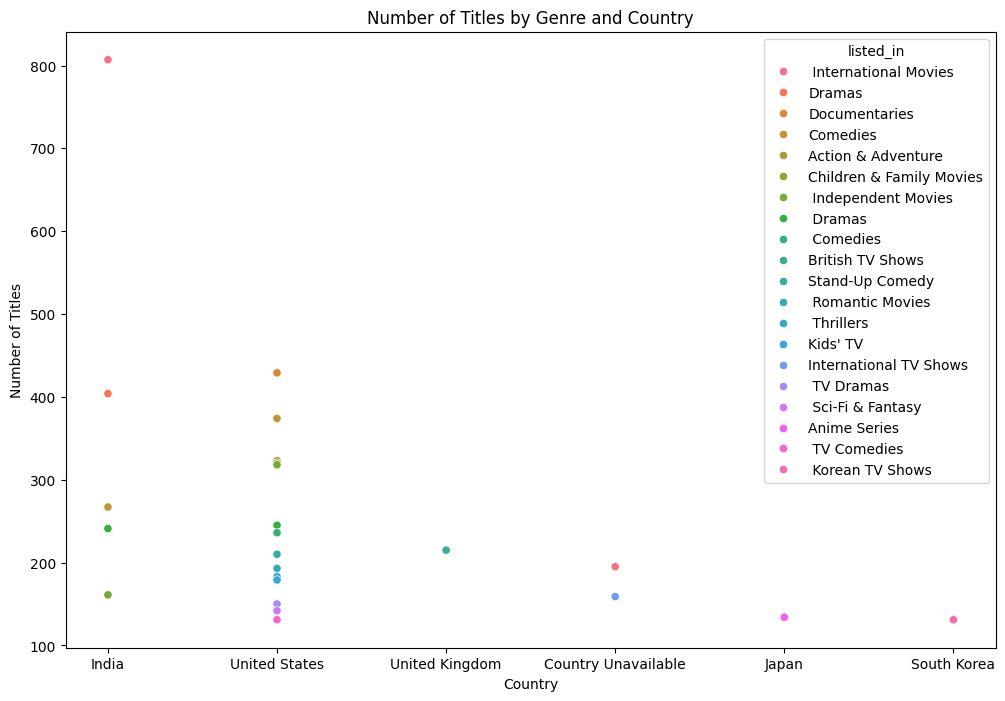

In [ ]:
genrevscountry = netflix_final.groupby(['country','listed_in'])['title'].nunique().sort_values(ascending=False).reset_index()
genrevscountry.columns=['country','listed_in','count']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='country', y='count',hue='listed_in',data=genrevscountry.head(25))
plt.title('Number of Titles by Genre and Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

From the above scatterplot we can find the popularity of Genre according to the country . We can observe that international movies are highly popular in India.

# Distribution of Content based on Rating

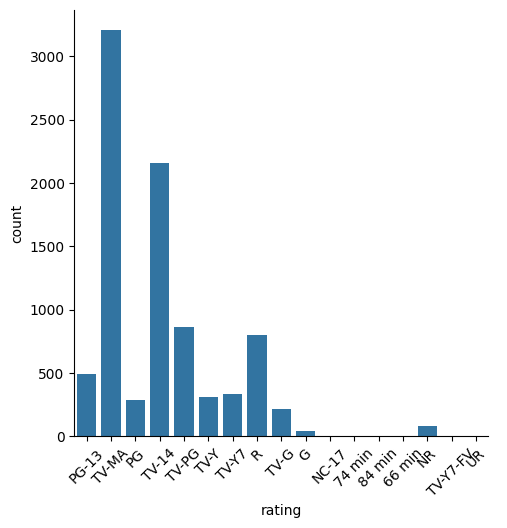

In [ ]:
sns.catplot(x='rating',kind="count",data=netflix_main)
plt.xticks(rotation=45)
plt.show()

TV-MA is designated for adult viewing and may not be suitable for individuals under 17. Titles with this rating are the most prevalent on Netflix.

A pairplot plot a pairwise relationships between numerical data in a dataset.


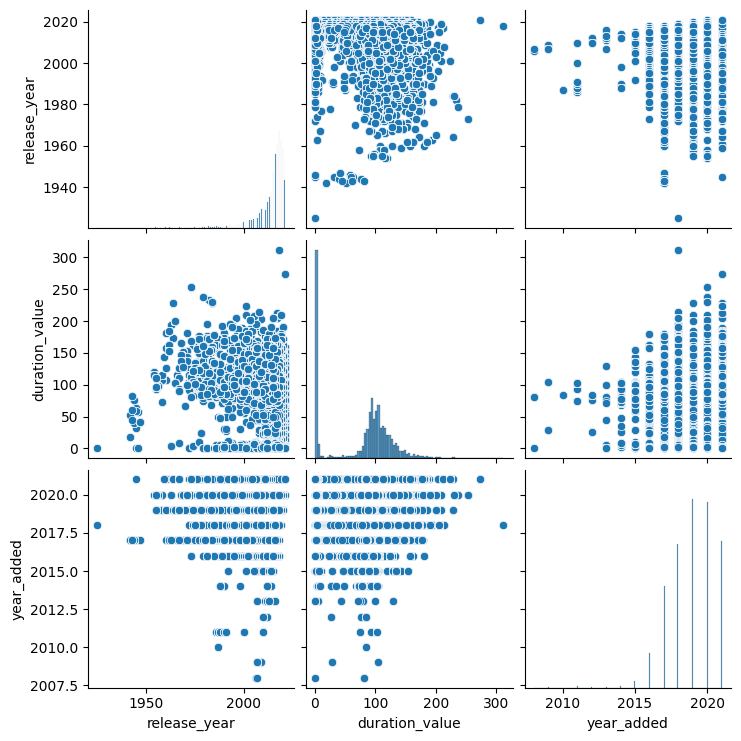

In [ ]:
sns.pairplot(netflix_final);

Analysis of correlation

<ipython-input-80-4dd89dfd711d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



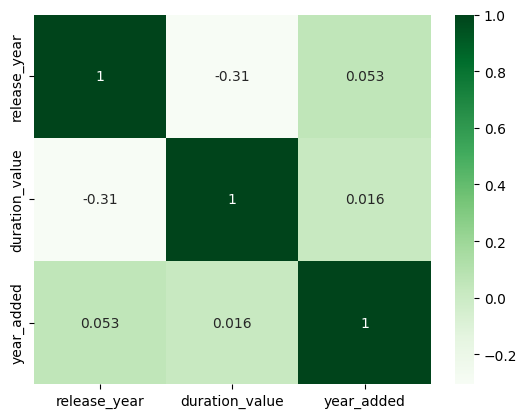

In [ ]:
sns.heatmap(netflix_final.corr(), cmap= "Greens",annot=True)
plt.show()

There is a noticeable positive correlation between the release year and the year added, as well as the duration of movies and TV shows when considering the year added. On the contrary, a negative correlation exists between duration and release year, indicating a greater emphasis on shorter content formats compared to previous years.

Analysis on Genre of each Rating certification

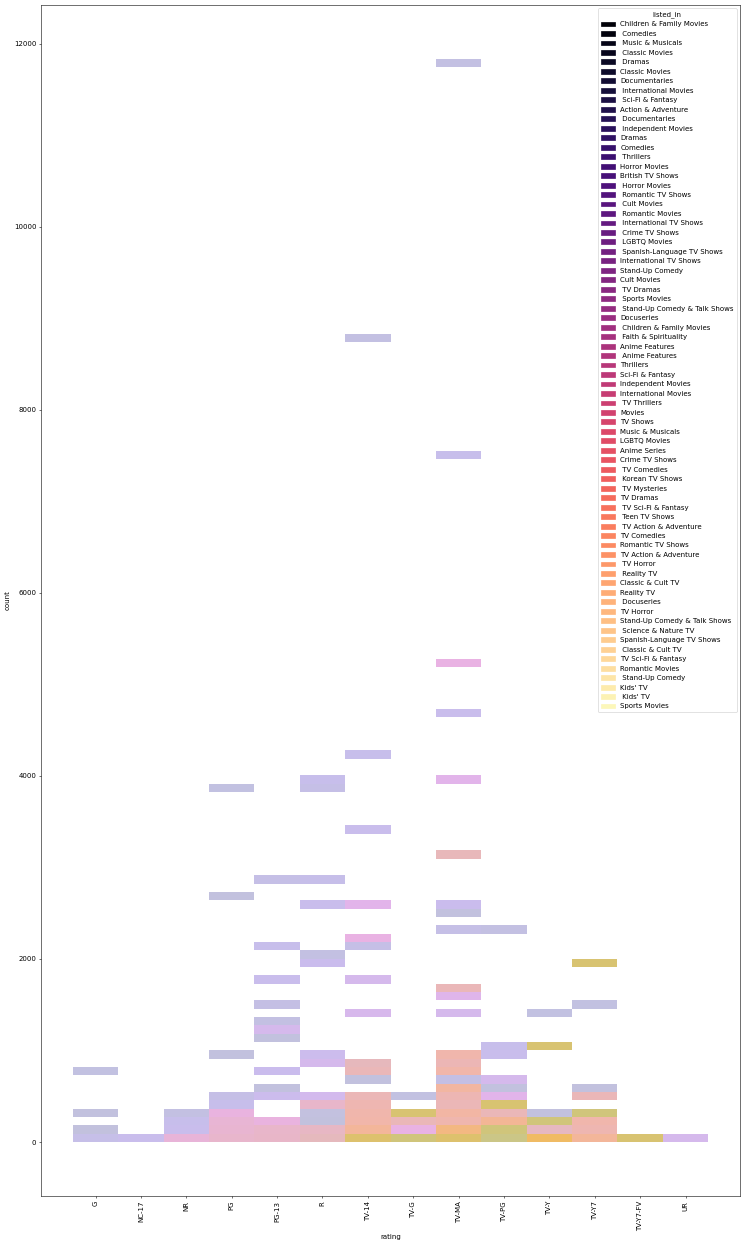

In [ ]:
a = netflix_final.groupby('rating')[['listed_in']].value_counts().reset_index()
a.columns=['rating','listed_in','count']
plt.figure(figsize=(15,25),dpi=50)
ax = sns.histplot(data=a, x="rating",y="count", hue="listed_in",palette = 'magma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Missing Values and Outlier Check

Outlier is a data that deviates abnormally from the standard data . We can see that in the current data set we can find some outliers on the duration boxplots of tvshows and movies.

Outliers needs to be treated because it may lead to misleading predictions while using ML modules.Outliers are subjective to each data set, hence if the impact of the outlier is extereme then treatment might be required.

In the dataset before analysis we treated the missing values NaN with some default values and dropped some rows.The data becomes inconsistent and may be unable to work with if empty values are present.Ml modules throw error if dataset is having null values.Hence treating missing values is essential before analysis.

In the data set provided there wrere  total of 4307 null values  with 2634 missing points under
"director", 825 under "cast", 831 under "country", 11 under "date_added", 4 under "rating" and
3 under “duration ”.We have treated it with imputation before proceeding on with the analysis.

# Business Insights



* From te above analysis we could see that Netlix added more movies than TV Shows.We can say that movies dominate their content library
* An examination of movie lengths indicated a peak around the 1960s, succeeded by a stabilization around the 100-minute mark, spotlighting a discernible trend in movie durations over time.
* The dispersion of ratings across the years provides insights that most of the content has a rating of TV-MA
* The month of July stands out as the period when Netflix introduces the most content, closely trailed by December, signifying a deliberate approach to content rollout.
* The majority of TV shows on Netflix encompass a single season, implying a penchant for shorter series among the audience.
* The analysis underscores that the USA significantly dominates content contribution, highlighting the need for Netflix to concentrate on incorporating regional content from the countries where it is expanding.
* Words such as love, life, family, and adventure recurred frequently in titles and descriptions, encapsulating prevailing themes in Netflix content.
* Our exploration into data analysis underscored the potency of data in unraveling the enigmas of Netflix's content landscape, furnishing valuable insights for both viewers and content creators.
* As the streaming industry undergoes transformations, comprehending these patterns and trends becomes increasingly imperative for navigating the dynamic expanse of Netflix and its extensive library.




# Recommendation

* Netflix ought to prioritize augmenting its collection of TV shows, particularly those with a single season duration, catering to the preferences of viewers inclined towards television series rather than movies.
* Based on the popularity of the director or director-actor pair Netflix can produce more content, which will increase the usage of the platform
* By implementing the aforementioned strategy, directors are likely to be motivated to create higher-quality content, whether in the form of movies or TV shows.
* Considering the extended viewing times associated with the top genre, it would be prudent to incorporate more content within that category.
* Given that a significant portion of OTT-released movies is from the year 2019, it becomes imperative to continually elevate this figure. This aims to entice individuals by demonstrating that subscribing to Netflix is advantageous, as the platform consistently delivers an increasing number of movies each year.
* The primary emphasis for OTT releases should be on festival holidays, year-end periods, and weekends. These specific time frames warrant focused attention for strategic content launches.
* Advertising efforts in countries with a limited number of movie releases should be intensified, aiming to captivate the audience by producing native TV shows tailored to their preferences.
* Certain movies with positive reviews can be directly released on OTT platforms, potentially boosting subscriptions. Additionally, there is an opportunity to leverage actors with substantial followings by featuring them in TV shows or web series to further enhance the platform's appeal.


